In [1]:
import torch
print ('Current cuda device in use: ', torch.cuda.current_device())

Current cuda device in use:  0


In [2]:
from fastai.text import *
import sentencepiece as spm #https://github.com/google/sentencepiece
import os

In [3]:
from tokenizer_utils import CustomTokenizer, SPTokenizer

In [4]:
vocab_size = 600
model_prefix = 'char_clean_code_challenge_model'

In [5]:
## load up the Processor
sp = spm.SentencePieceProcessor()
sp.load(f'{model_prefix}.model')

True

In [6]:
itos = []
with open(f'{model_prefix}.vocab','r') as f:
    for line_num,line in enumerate(f):
        itos.append(line.split("\t")[0])

In [7]:
mycust_tok = CustomTokenizer(SPTokenizer, model_prefix)

In [8]:
#setup Vocab object for use in LM
sp_vocab = Vocab(itos)

In [9]:
data = load_data('./','20200811_char_model_databunch_data_save_temp.pkl', bs=1200) 

/opt/tljh/user/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [10]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True

learn = language_model_learner(data, AWD_LSTM, pretrained=False, config=config, drop_mult=0.3)

In [11]:
print(learn.model)

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(91, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(91, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=800, out_features=3456, bias=True)
            )
          )
        )
      )
      (1): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1152, out_features=3456, bias=True)
            )
          )
        )
      )
      (2): QRNN(
        (layers): ModuleList(
          (0): QRNNLayer(
            (linear): WeightDropout(
              (module): Linear(in_features=1152, out_features=1200, bias=True)
            )
          )
        )
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropo

In [12]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.45E-03
Min loss divided by 10: 3.31E-01


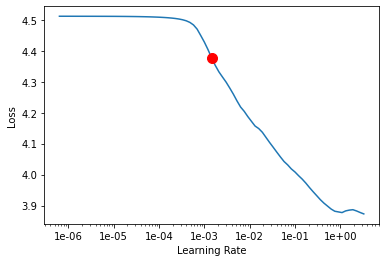

In [13]:
learn.recorder.plot(suggestion=True)

In [14]:
learn.fit_one_cycle(1, slice(1e-2, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.189574,1.125358,0.676380,16:51


In [15]:
learn.save('20200820_fit_head_char_model_qrnn')

In [16]:
learn.load('20200820_fit_head_char_model_qrnn');

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(30, slice(1e-2, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.151147,1.102049,0.682327,16:51
1,1.130703,1.081964,0.687740,16:54
2,1.100638,1.062925,0.692591,16:54
3,1.103287,1.052960,0.694990,16:55
4,1.093114,1.046041,0.696836,16:56
5,1.101329,1.046921,0.696637,16:56
6,1.077110,1.038959,0.698781,16:56
7,1.081393,1.035319,0.699457,16:55
8,1.065002,1.026273,0.701604,16:54
9,1.062649,1.018463,0.703680,16:55


In [19]:
learn.save('20200820_fine_tuned_char_model_qrnn')

In [20]:
learn.load('20200820_fine_tuned_char_model_qrnn');

In [21]:
TEXT = "import from"
N_WORDS = 25
N_SENTENCES = 3
for _ in range(N_SENTENCES):
    predicted = learn.predict(TEXT, N_WORDS, temperature=0.9)
    val = predicted.replace(TEXT, '')
    decoded = sp.decode_pieces(val.split())
    print(TEXT + " "+  decoded)

import from _member.__navigation_sett
import from specific in self._parame
import from controllerlink_to_enviro


In [22]:
print(learn.summary()) 

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [70, 400]            0          False     
______________________________________________________________________
RNNDropout           [70, 1152]           0          False     
______________________________________________________________________
RNNDropout           [70, 1152]           0          False     
______________________________________________________________________
Linear               [70, 91]             36,491     True      
______________________________________________________________________
RNNDropout           [70, 400]            0          False     
______________________________________________________________________

Total params: 36,491
Total trainable params: 36,491
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function :

In [23]:
TEXT = "from pandas import"
N_WORDS = 25
N_SENTENCES = 5
for _ in range(N_SENTENCES):
    predicted = learn.predict(TEXT, N_WORDS, temperature=0.9)
    val = predicted.replace(TEXT, '')
    decoded = sp.decode_pieces(val.split())
    print(TEXT + " "+  decoded)

from pandas import webbrowser self.login fr
from pandas import __http_args or [ 'Pipeli
from pandas import iterations is not None p
from pandas import service params to servic
from pandas import difference if not isinst
